In [27]:
features_only_features.columns

Index(['Mean_Intensity', 'Std_Intensity', 'Variance_Intensity',
       'Min_Intensity', 'Max_Intensity', 'Median_Intensity', 'Contrast',
       'Entropy', 'Smoothness'],
      dtype='object')

/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [42]:
import pandas as pd

# Assuming df_features is loaded correctly as shown
df_features = pd.read_csv("/home/j.maragall/Pipeline_CellMapping/HE_9fs.csv")

# Assuming df_presentation is loaded correctly and unique_id is created as shown
df_presentation = pd.read_csv('/home/j.maragall/PRESENTATION_FEATURES.csv')
df_presentation.fillna(0, inplace=True)
df_presentation['unique_id'] = df_presentation.apply(lambda x: f"ROI_{int(x['minr'])}_{int(x['maxr'])}_{int(x['minc'])}_{int(x['maxc'])}", axis=1)
unique_ids = df_presentation['unique_id'].copy()

# Create the aligned_unique_id in df_features based on existing data (if needed)
# For example, if df_features already correctly matches the unique_id pattern and just needs renaming:
df_features['aligned_unique_id'] = df_features['ROI_ID']  # Adjust if your identifier column is named differently

# Now, sort both DataFrames by their aligned unique identifiers
df_features_sorted = df_features.sort_values(by='aligned_unique_id').reset_index(drop=True)
#df_presentation_sorted = df_features_sorted.drop('labels', axis=1)
df_presentation_sorted = df_presentation.sort_values(by='unique_id').reset_index(drop=True)
#df_presentation_sorted = df_presentation_sorted.drop('presentation_labels', axis=1)

import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Example matrix A with dimensions (n_samples, n_features)
features_only_features = df_features_sorted.drop(['aligned_unique_id', 'ROI_ID'], axis=1)

# Impute all NaN values with 0
features_only_features.fillna(0, inplace=True)

from sklearn.preprocessing import MinMaxScaler

# Assuming 'features_only_features' DataFrame already has the desired features and column names
column_names = features_only_features.columns

# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the data
scaled_features = pd.DataFrame(scaler.fit_transform(features_only_features), columns=column_names)


features_only_presentation = df_presentation_sorted.drop(['unique_id'], axis=1).fillna(0)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Example DataFrame df_ae_transformed and features_only_presentation
# Ensure df_ae_transformed['Val'] and features_only_presentation are defined

# Define a range of alpha values to iterate over
alpha_values = np.linspace(0.1, 1.0, 42)  # for example, from 0.1 to 1.0 in 10 steps

# List to store the results
results = []

# Loop over each alpha value
for alpha in alpha_values:
    # Scale 'Val' by current alpha
    scaled_val = (features_only_features['Variance_Intensity'] * alpha).fillna(0)

    # Multiply features_only_presentation with the scaled 'Val'
    weighted_combined = features_only_presentation.mul(scaled_val, axis=0)

    # UMAP models for embedding
    umap_model_features = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")
    umap_model_presentation = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")

    # Compute embeddings
    weighted_embedding_features = umap_model_features.fit_transform(weighted_combined)
    deep_embedding_presentation = umap_model_presentation.fit_transform(features_only_presentation)

    # Calculate cosine similarity
    similarity = cosine_similarity(weighted_embedding_features, deep_embedding_presentation)
    
    # Store alpha and the first value of cosine similarity matrix (assuming comparison of the whole set to itself)
    results.append({'alpha': alpha, 'cosine_similarity': similarity[0][0]})

# Create a DataFrame to hold the results
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)


results_df.to_csv('Variance_Weighted_CODEX_.csv', index=False)


/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

       alpha  cosine_similarity
0   0.100000           0.624391
1   0.121951           0.282155
2   0.143902          -0.509374
3   0.165854           0.302022
4   0.187805           0.211466
5   0.209756          -0.371615
6   0.231707           0.279320
7   0.253659          -0.513553
8   0.275610           0.278917
9   0.297561           0.270367
10  0.319512           0.299760
11  0.341463           0.278790
12  0.363415           0.295989
13  0.385366          -0.433738
14  0.407317          -0.499531
15  0.429268           0.281346
16  0.451220          -0.503376
17  0.473171           0.290858
18  0.495122           0.323689
19  0.517073           0.268837
20  0.539024           0.293435
21  0.560976           0.251567
22  0.582927           0.295171
23  0.604878           0.270358
24  0.626829           0.292964
25  0.648780          -0.498167
26  0.670732           0.297312
27  0.692683           0.294993
28  0.714634           0.302320
29  0.736585           0.271583
30  0.75

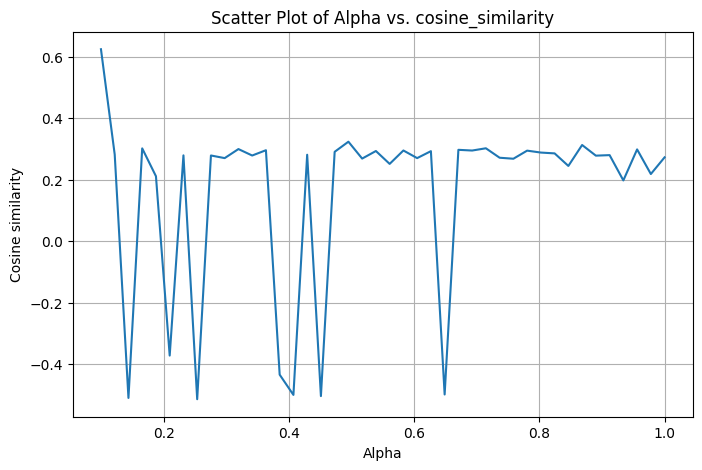

In [44]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(results_df['alpha'], results_df['cosine_similarity'])
plt.title('Scatter Plot of Alpha vs. cosine_similarity')
plt.xlabel('Alpha')
plt.ylabel('Cosine similarity')
plt.grid(True)
plt.show()

In [40]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Example alpha value
alpha = .4

# Assuming 'scaled_val' comes from a DataFrame and 'Val' is the column to use
scaled_val = (features_only_features['Variance_Intensity'] * alpha).fillna(0)

# If scaled_val is already calculated but in DataFrame format
# scaled_val = scaled_val.squeeze()  # Convert DataFrame with single column to Series

# Multiply features_only_presentation with the scaled 'Val'
weighted_combined = features_only_presentation.mul(scaled_val, axis=0)


umap_model_features = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")
umap_model_presentation = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")

weighted_embedding_features = umap_model_features.fit_transform(weighted_combined)
deep_embedding_presentation = umap_model_presentation.fit_transform(features_only_presentation)


df_weighted = pd.DataFrame(weighted_embedding_features)
df_presentation = pd.DataFrame(deep_embedding_presentation)

# Calculate cosine similarity
similarity = cosine_similarity(df_weighted, df_presentation)

print("Cosine Similarity:", similarity[0][0])

/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/j.maragall/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f

Cosine Similarity: 0.6243906
